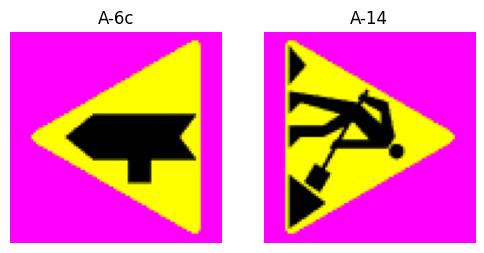

In [40]:
from fastai.data.transforms import get_image_files

from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import Resize
from fastai.vision.augment import aug_transforms

import re

signsDataSetDir = 'nn-dataset/preprocessed/warn'
learner_output_dir = '.'
znakiFiles = get_image_files(signsDataSetDir)

labels_pattern = r'([A-Z]-\d+[a-z]?)_(\d+).\w+'
rgxp = re.compile(labels_pattern)
rgxp.match(znakiFiles[0].name)

dls = ImageDataLoaders.from_name_re(learner_output_dir, znakiFiles, labels_pattern, bs=2)
dls.show_batch()

SuggestedLRs(valley=0.0012022644514217973)

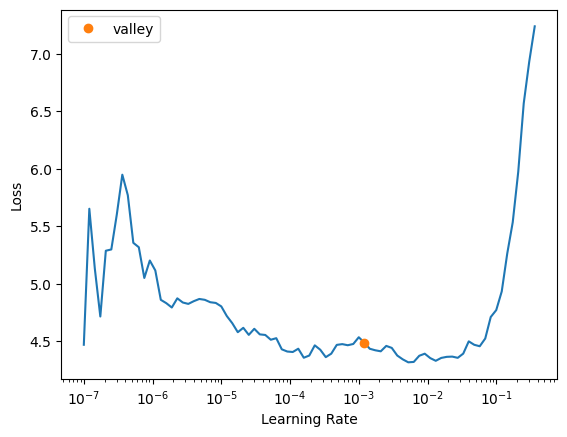

In [41]:
from fastai.vision.all import *
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.lr_find()

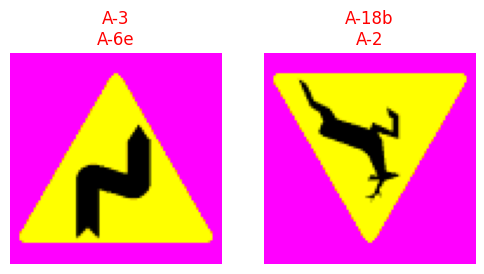

In [42]:
learning_rate = 0.0012022644514217973
epochs = 10
learn.fine_tune(epochs, learning_rate)
learn.show_results()

In [ ]:
learn.export()